# Polymer brush compression

This notebook compares the compression of various polymer brushes with different dispersities. We compare compression with and without a redistribution of the polymer mass.

In [6]:
%load_ext autoreload
%autoreload 2

In [27]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [44]:
# Import custom package
import brush as b
from config import FIGURE_SIZE, FIGURE_SIZE_LARGE, FIGURE_DPI, nature_colors

## Compare compression base on profile with compression from simulation

In [3]:
# Load the profiles
osmotic_prefactor = 1.0
brush_10 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D100.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_11 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D110.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_12 = b.Brush("simulation",
                   {"filename": "../data/Density_Profile_D120.csv"},
                   osmotic_prefactor=osmotic_prefactor)
brush_14 = b.Brush("simulation",
                   {"filename": "../data/Density_profile_D140.csv"},
                   osmotic_prefactor=osmotic_prefactor)

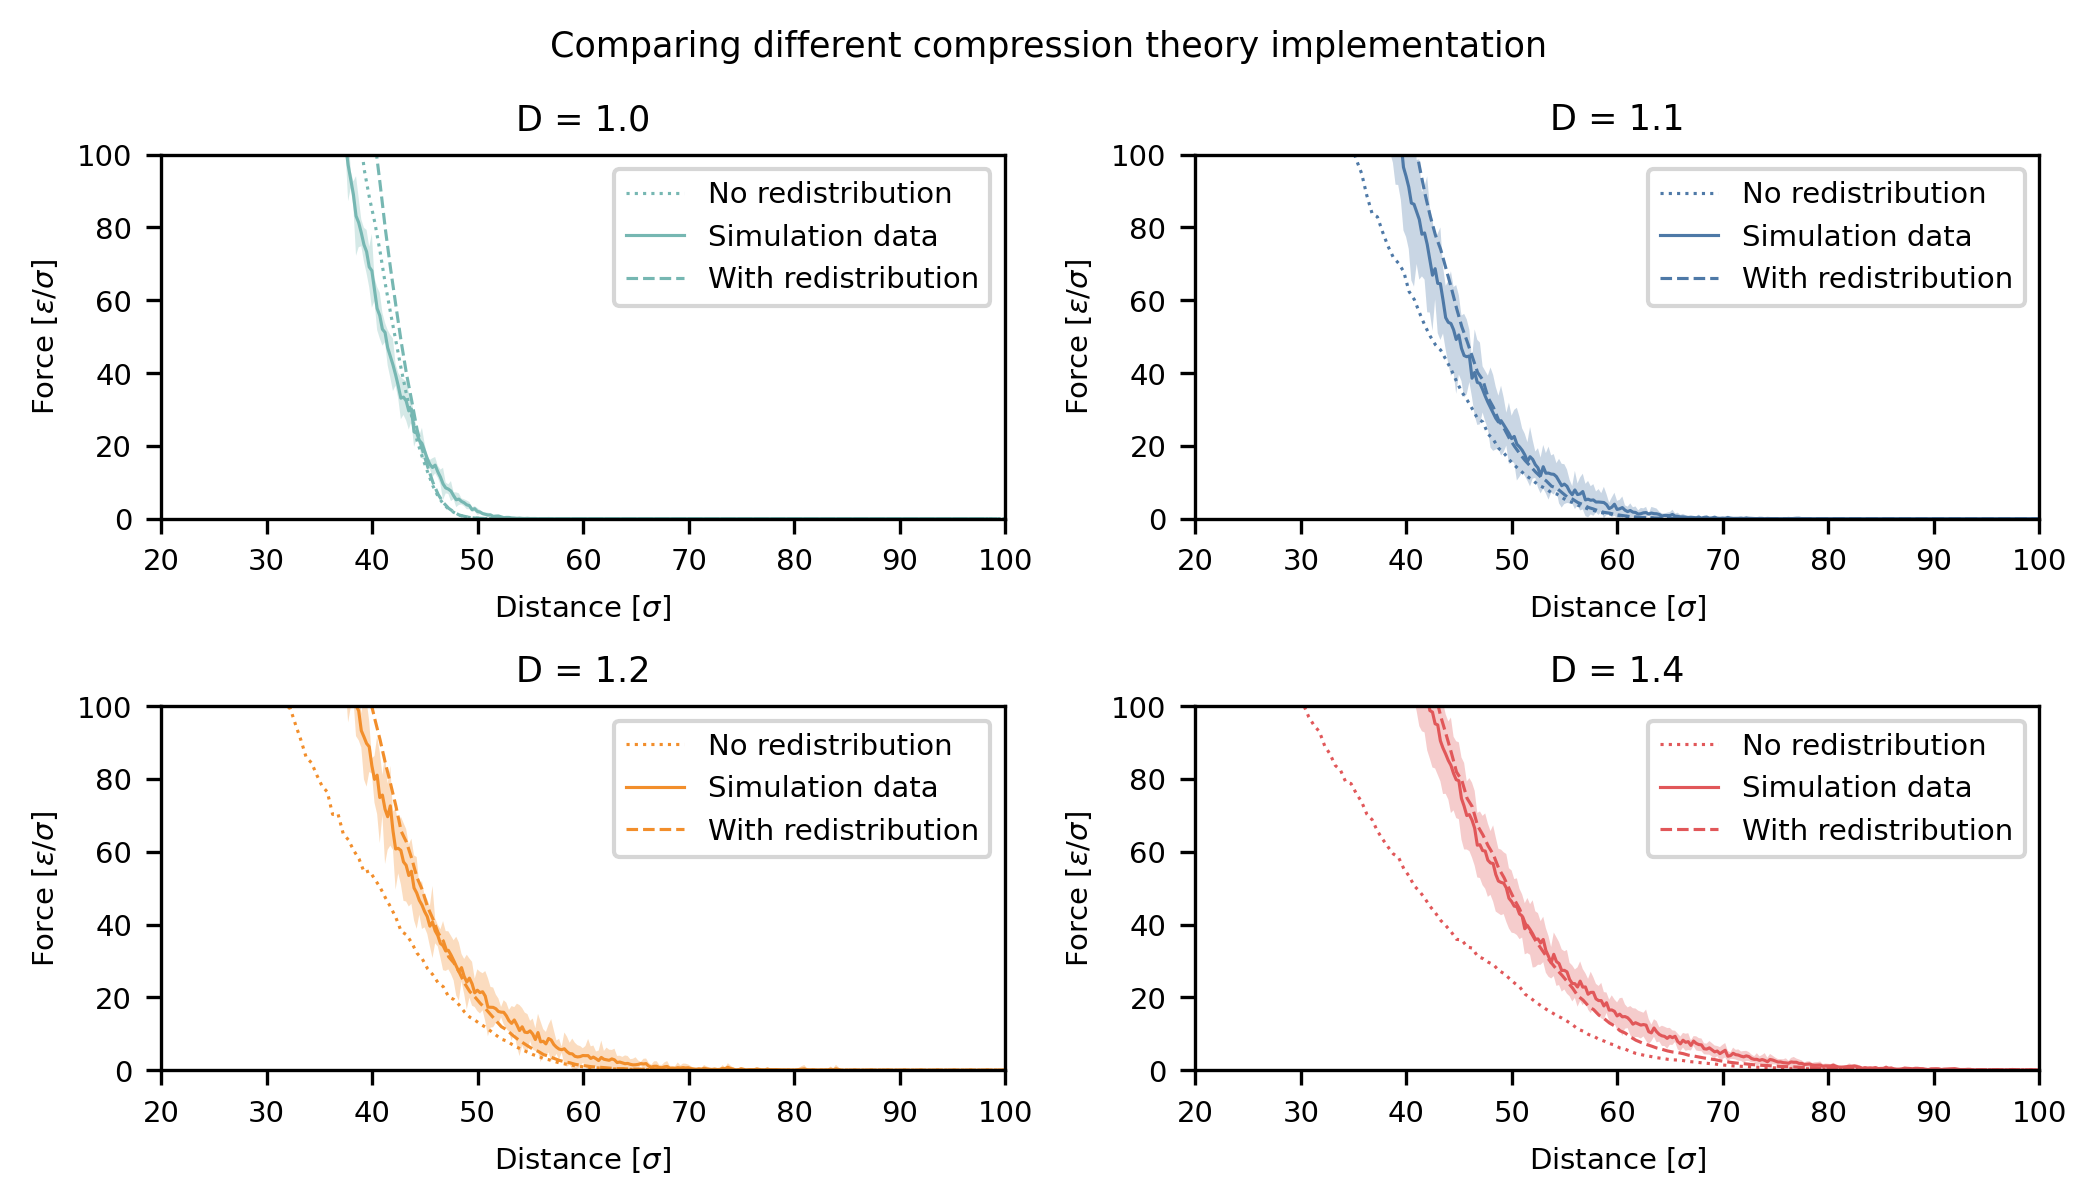

In [4]:
# Compress the profiles 
beta = 0.00
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)

OFFSET = 3

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10.z, brush_10.compression_force, ":", label='No redistribution', color=nature_colors[3])
data = pd.read_csv("../data/Compression_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),'-', label='Simulation data', color=nature_colors[3])
ax[0][0].fill_between(data.z.to_numpy()-OFFSET,data.CI_lower.to_numpy(),data.CI_upper.to_numpy(), alpha = 0.3, color=nature_colors[3],edgecolor=None)
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][0].plot(brush_10.z,brush_10.compression_force,'--', label='With redistribution', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")

ax[0][1].plot(brush_11.z, brush_11.compression_force, ":", label='No redistribution', color=nature_colors[0])
data = pd.read_csv("../data/Compression_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),'-', label='Simulation data', color=nature_colors[0])
ax[0][1].fill_between(data.z.to_numpy()-OFFSET,data.CI_lower.to_numpy(),data.CI_upper.to_numpy(), alpha = 0.3, color=nature_colors[0],edgecolor=None)
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][1].plot(brush_11.z,brush_11.compression_force,'--', label='With redistribution', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12.z, brush_12.compression_force, ":", label='No redistribution', color=nature_colors[1])
data = pd.read_csv("../data/Compression_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),'-', label='Simulation data', color=nature_colors[1])
ax[1][0].fill_between(data.z.to_numpy()-OFFSET,data.CI_lower.to_numpy(),data.CI_upper.to_numpy(), alpha = 0.3, color=nature_colors[1],edgecolor=None)
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][0].plot(brush_12.z,brush_12.compression_force,'--', label='With redistribution', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14.z, brush_14.compression_force, ":", label='No redistribution', color=nature_colors[2])
data = pd.read_csv("../data/Compression_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),'-', label='Simulation data', color=nature_colors[2])
ax[1][1].fill_between(data.z.to_numpy()-OFFSET,data.CI_lower.to_numpy(),data.CI_upper.to_numpy(), alpha = 0.3, color=nature_colors[2],edgecolor=None)
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][1].plot(brush_14.z,brush_14.compression_force,'--', label='With redistribution', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([20,100])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,100])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing different compression theory implementation")
fig.tight_layout()


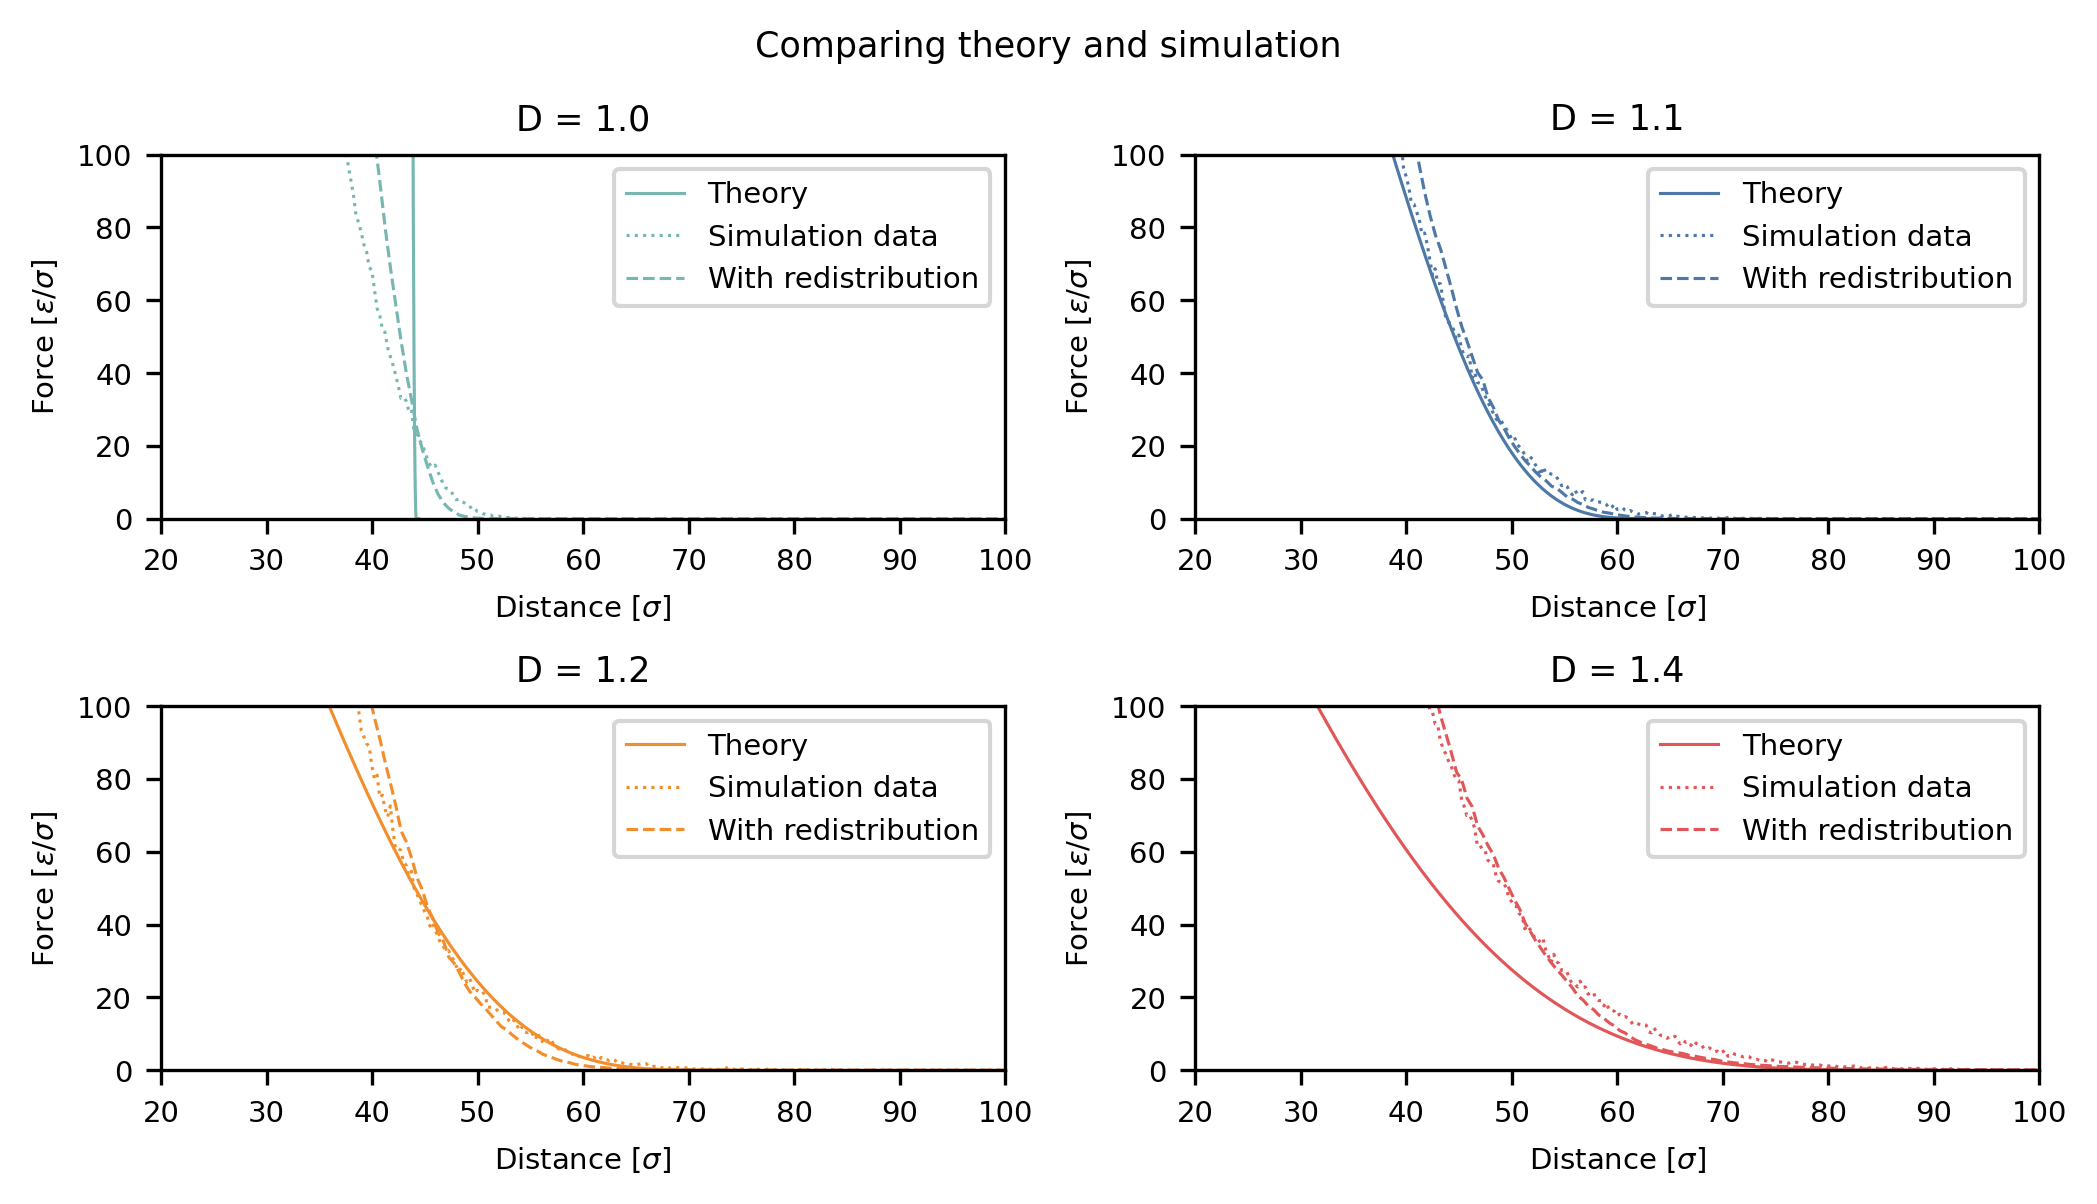

In [5]:
# Compress the profiles 
beta = 0.00
volume_scaling = 1.667
brush_10_th = b.Brush("model",
                      {"type" : "gaussian",
                       "Mn" : 100,
                       "sigma" : 0.1},
                       volume_scaling=volume_scaling)
brush_10_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_11_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.1},
                       volume_scaling=volume_scaling)
brush_11_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_12_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.2},
                       volume_scaling=volume_scaling)
brush_12_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_14_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.4},
                       volume_scaling=volume_scaling)
brush_14_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)

OFFSET = 3

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10_th.z, brush_10_th.compression_force, "-", label='Theory', color=nature_colors[3])
data = pd.read_csv("../data/Compression_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[3])
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][0].plot(brush_10.z,brush_10.compression_force,'--', label='With redistribution', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")


ax[0][1].plot(brush_11_th.z, brush_11_th.compression_force, "-", label='Theory', color=nature_colors[0])
data = pd.read_csv("../data/Compression_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[0])
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][1].plot(brush_11.z,brush_11.compression_force,'--', label='With redistribution', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12_th.z, brush_12_th.compression_force, "-", label='Theory', color=nature_colors[1])
data = pd.read_csv("../data/Compression_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[1])
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][0].plot(brush_12.z,brush_12.compression_force,'--', label='With redistribution', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14_th.z, brush_14_th.compression_force, "-", label='Theory', color=nature_colors[2])
data = pd.read_csv("../data/Compression_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[2])
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][1].plot(brush_14.z,brush_14.compression_force,'--', label='With redistribution', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([20,100])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,100])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing theory and simulation")
fig.tight_layout()

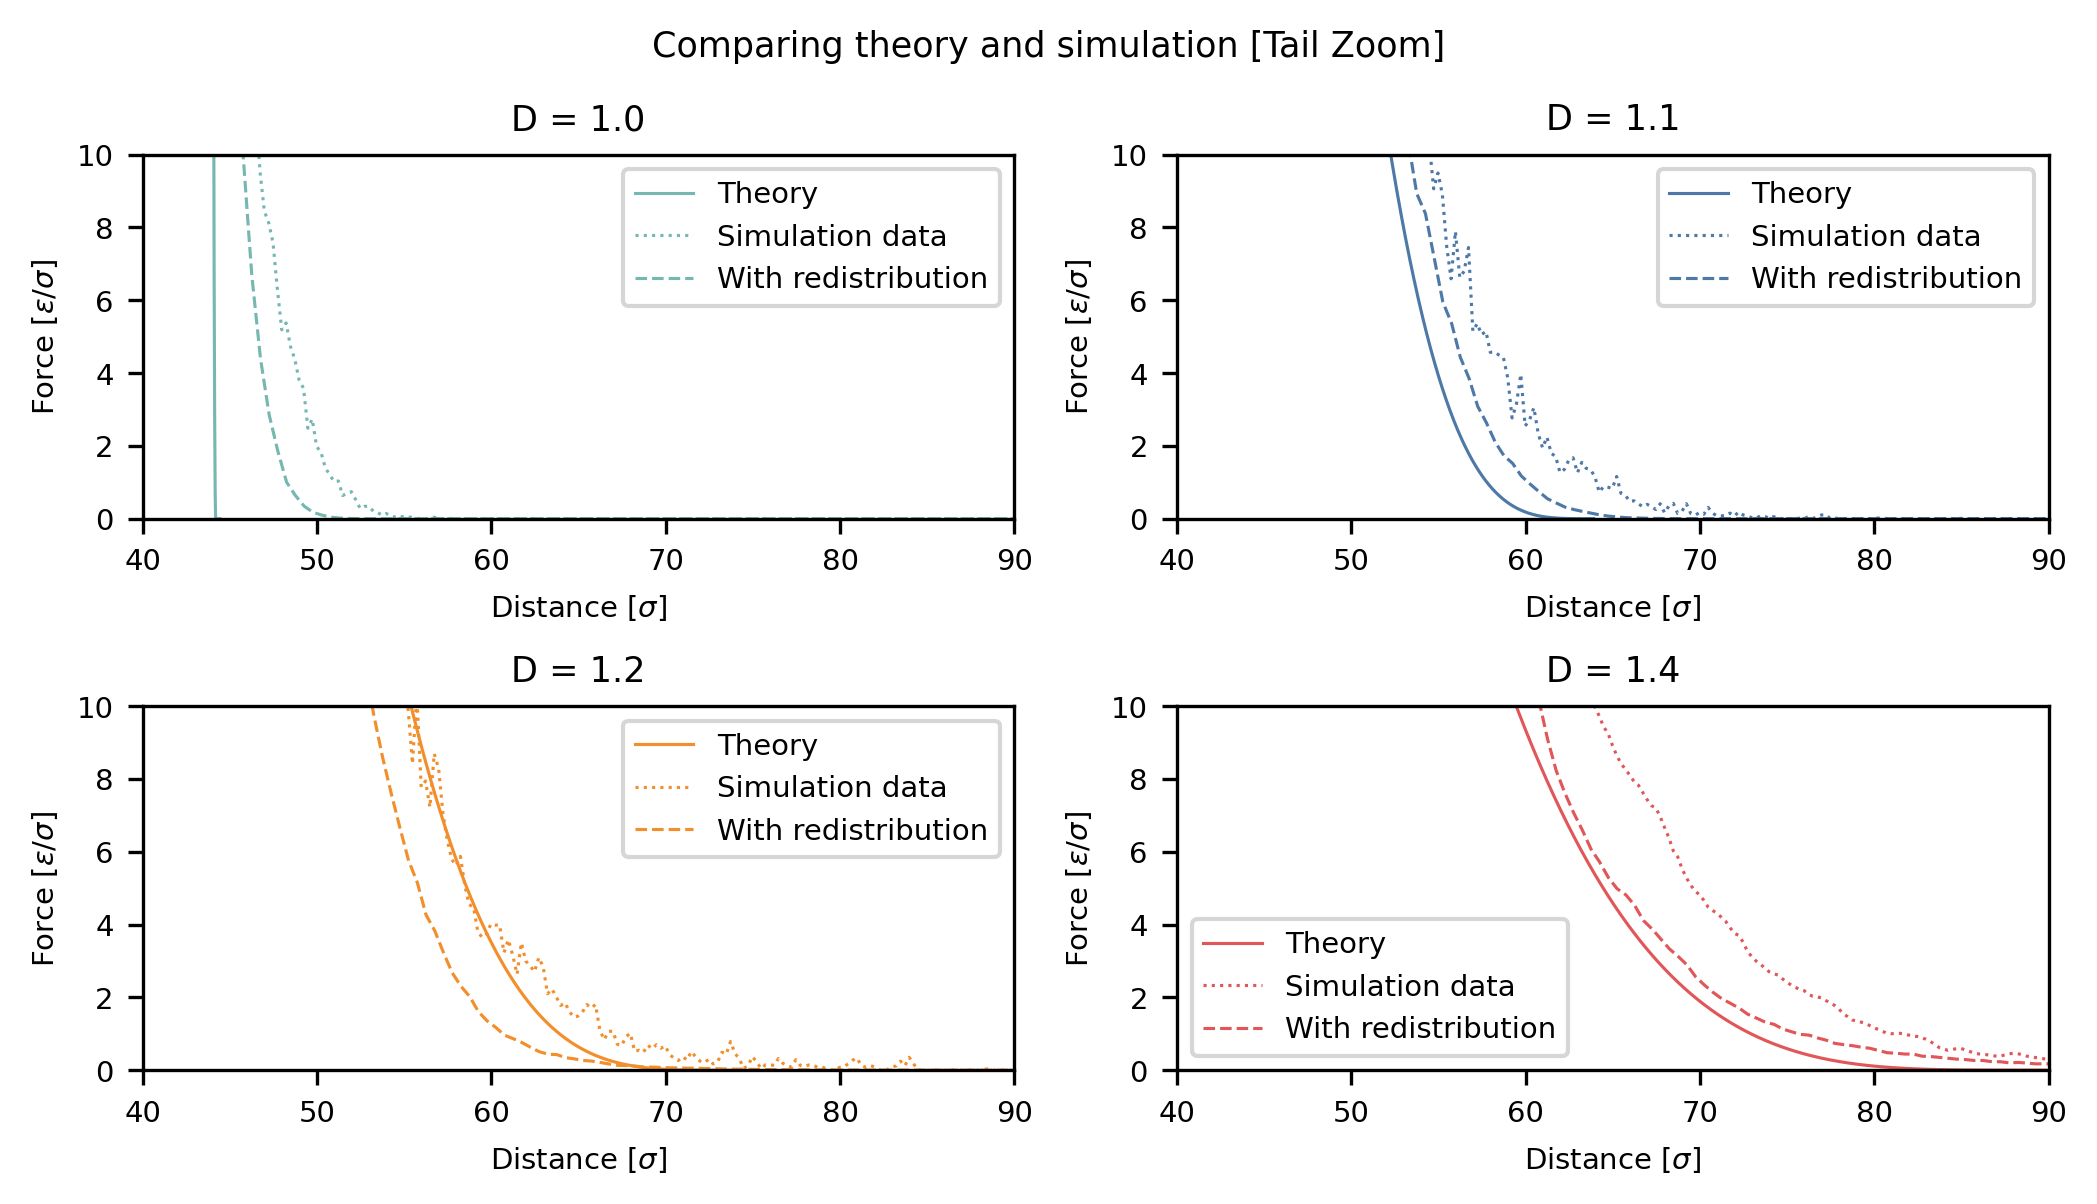

In [ ]:
# Compress the profiles 
beta = 0.00
volume_scaling = 1.667
brush_10_th = b.Brush("model",
                      {"type" : "gaussian",
                       "Mn" : 100,
                       "sigma" : 0.1},
                       volume_scaling=volume_scaling)
brush_10_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_11_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.1},
                       volume_scaling=volume_scaling)
brush_11_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_12_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.2},
                       volume_scaling=volume_scaling)
brush_12_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)
brush_14_th = b.Brush("model",
                      {"type": "schulz-zimm",
                       "Mn" : 100,
                       "D" : 1.4},
                       volume_scaling=volume_scaling)
brush_14_th.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=False)

OFFSET = 3

fig, ax = plt.subplots(figsize=FIGURE_SIZE_LARGE, dpi=FIGURE_DPI,ncols=2,nrows=2)

ax[0][0].plot(brush_10_th.z, brush_10_th.compression_force, "-", label='Theory', color=nature_colors[3])
data = pd.read_csv("../data/Compression_D100.csv")
ax[0][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[3])
brush_10.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][0].plot(brush_10.z,brush_10.compression_force,'--', label='With redistribution', color=nature_colors[3])
ax[0][0].set_title("D = 1.0")


ax[0][1].plot(brush_11_th.z, brush_11_th.compression_force, "-", label='Theory', color=nature_colors[0])
data = pd.read_csv("../data/Compression_D110.csv")
ax[0][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[0])
brush_11.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[0][1].plot(brush_11.z,brush_11.compression_force,'--', label='With redistribution', color=nature_colors[0])
ax[0][1].set_title("D = 1.1")


ax[1][0].plot(brush_12_th.z, brush_12_th.compression_force, "-", label='Theory', color=nature_colors[1])
data = pd.read_csv("../data/Compression_D120.csv")
ax[1][0].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[1])
brush_12.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][0].plot(brush_12.z,brush_12.compression_force,'--', label='With redistribution', color=nature_colors[1])
ax[1][0].set_title("D = 1.2")


ax[1][1].plot(brush_14_th.z, brush_14_th.compression_force, "-", label='Theory', color=nature_colors[2])
data = pd.read_csv("../data/Compression_D140.csv")
ax[1][1].plot(data.z.to_numpy()-OFFSET,data.F_mean.to_numpy(),':', label='Simulation data', color=nature_colors[2])
brush_14.compress_profile(beta=beta,surface_area=2250,redistribute_polymer=True)
ax[1][1].plot(brush_14.z,brush_14.compression_force,'--', label='With redistribution', color=nature_colors[2])
ax[1][1].set_title("D = 1.4")


for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    ax.set_xlim([40,90])
    ax.set_xlabel("Distance [$\sigma$]")
    ax.set_ylim([0,10])
    ax.set_ylabel("Force [$\epsilon/\sigma$]")
    ax.legend()
    
fig.suptitle("Comparing theory and simulation [Tail Zoom]")
fig.tight_layout()

## Calculate onset of force (1 epsilon/sigma, 10 epsilon/sigma)

In [58]:
def find_closest(f_target, brush=None, f=None, z=None):
    if f is None and z is None:
        idx = np.abs(brush.compression_force - f_target).argmin()
        # Get corresponding x
        z_closest = brush.z[idx]
        return z_closest
    else:
        f = savgol_filter(f,1,0)
        idx = np.abs(f - f_target).argmin()
        # Get corresponding x
        z_closest = z[idx]
        return z_closest

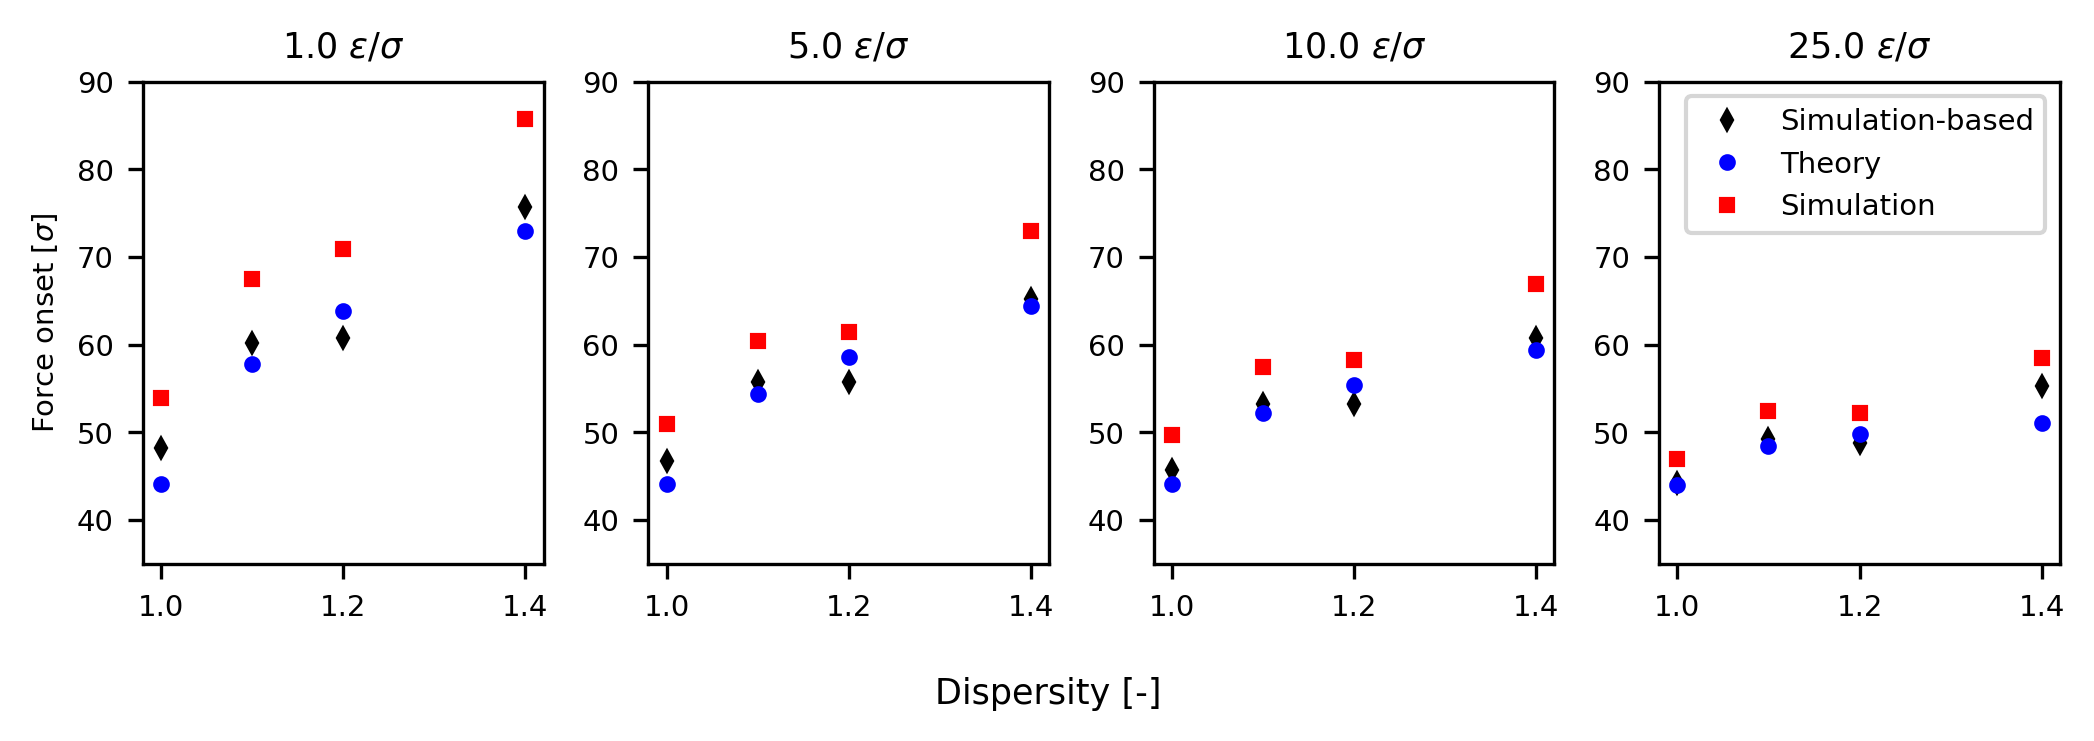

In [79]:
brushes = [brush_10, brush_11, brush_12, brush_14]
brushes_th = [brush_10_th, brush_11_th, brush_12_th, brush_14_th]
brushes_sim = ["../data/Compression_D100.csv","../data/Compression_D110.csv","../data/Compression_D120.csv","../data/Compression_D140.csv"]

D = [1.0, 1.1, 1.2, 1.4]
fig, ax = plt.subplots(figsize=(FIGURE_SIZE_LARGE[0],2.4),dpi=FIGURE_DPI,ncols=4)
threshold = 1.0
zs = [find_closest(threshold,brush) for brush in brushes]
ax[0].plot(D, zs, 'kd', label = "Simulation-based")
zth = [find_closest(threshold,brush) for brush in brushes_th]
ax[0].plot(D, zth, 'bo', label = 'Theory')
datas = [pd.read_csv(brush) for brush in brushes_sim]
zsim = [find_closest(threshold, f=df.F_mean.to_numpy(), z = df.z.to_numpy()) for df in datas]
ax[0].plot(D,zsim,'rs',label='Simulation')
ax[0].set_ylim([35,90])
ax[0].set_ylabel("Force onset [$\sigma$]")
ax[0].set_title(f"{threshold:3.1f} $\epsilon/\sigma$")
threshold = 5.0
zs = [find_closest(threshold,brush) for brush in brushes]
ax[1].plot(D, zs, 'kd', label = "Simulation-based")
zth = [find_closest(threshold,brush) for brush in brushes_th]
ax[1].plot(D, zth, 'bo', label = 'Theory')
datas = [pd.read_csv(brush) for brush in brushes_sim]
zsim = [find_closest(threshold, f=df.F_mean.to_numpy(), z = df.z.to_numpy()) for df in datas]
ax[1].plot(D,zsim,'rs',label='Simulation')
# ax[1].legend()
# ax[1].set_ylabel("Force onset [$\sigma$]")
ax[1].set_title(f"{threshold:3.1f} $\epsilon/\sigma$")
ax[1].set_ylim([35,90])

threshold = 10.0
zs = [find_closest(threshold,brush) for brush in brushes]
ax[2].plot(D, zs, 'kd', label = "Simulation-based")
zth = [find_closest(threshold,brush) for brush in brushes_th]
ax[2].plot(D, zth, 'bo', label = 'Theory')
datas = [pd.read_csv(brush) for brush in brushes_sim]
zsim = [find_closest(threshold, f=df.F_mean.to_numpy(), z = df.z.to_numpy()) for df in datas]
ax[2].plot(D,zsim,'rs',label='Simulation')
# ax[2].set_ylabel("Force onset [$\sigma$]")
ax[2].set_title(f"{threshold:3.1f} $\epsilon/\sigma$")
ax[2].set_ylim([35,90])

threshold = 25.0
zs = [find_closest(threshold,brush) for brush in brushes]
ax[3].plot(D, zs, 'kd', label = "Simulation-based")
zth = [find_closest(threshold,brush) for brush in brushes_th]
ax[3].plot(D, zth, 'bo', label = 'Theory')
datas = [pd.read_csv(brush) for brush in brushes_sim]
zsim = [find_closest(threshold, f=df.F_mean.to_numpy(), z = df.z.to_numpy()) for df in datas]
ax[3].plot(D,zsim,'rs',label='Simulation')
# ax[3].set_ylabel("Force onset [$\sigma$]")
ax[3].set_title(f"{threshold:3.1f} $\epsilon/\sigma$")
ax[3].set_ylim([35,90])
ax[3].legend()
fig.supxlabel("Dispersity [-]")
fig.tight_layout()